# Titanic Dataset - Exploratory Data Analysis (EDA)

This project involves performing exploratory data analysis (EDA) on the Titanic dataset to uncover meaningful insights. It includes handling missing values, cleaning data, visualizing key features, and summarizing the patterns found in the data.


**<h1>Import Libraries</h1>**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**<h1>Load Dataset</h1>**

In [6]:
train = pd.read_csv('titanic_train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Check for duplicate rows
print("Duplicate Rows in Dataset:", train.duplicated().sum())

# Remove duplicates
train.drop_duplicates(inplace=True)


Duplicate Rows in Dataset: 0


**<h1>Data Cleaning</h1>**

<h2>Missing Values</h2>

In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

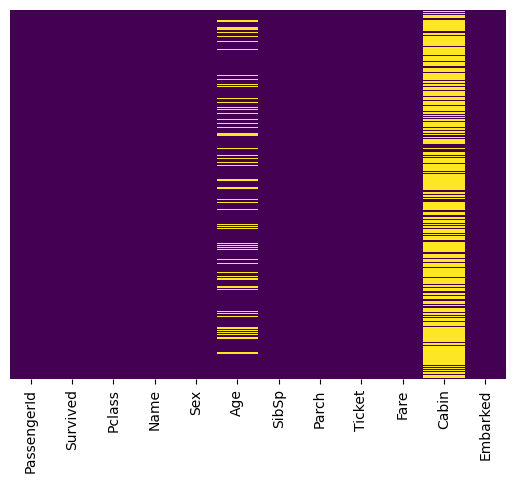

In [10]:
 sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

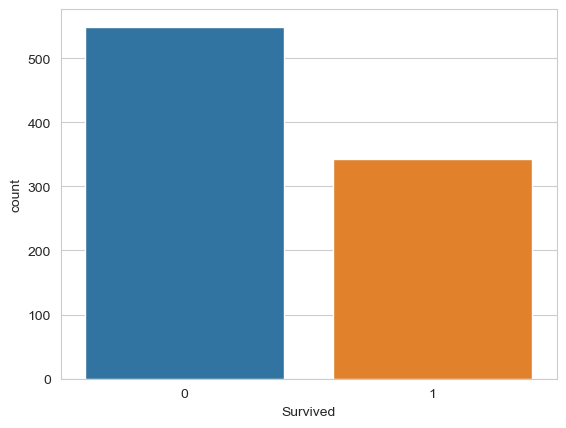

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

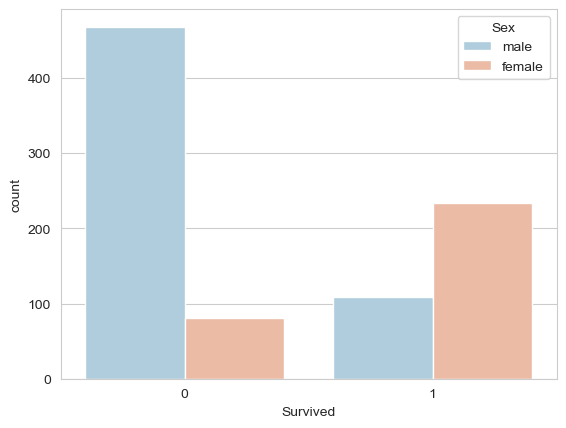

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

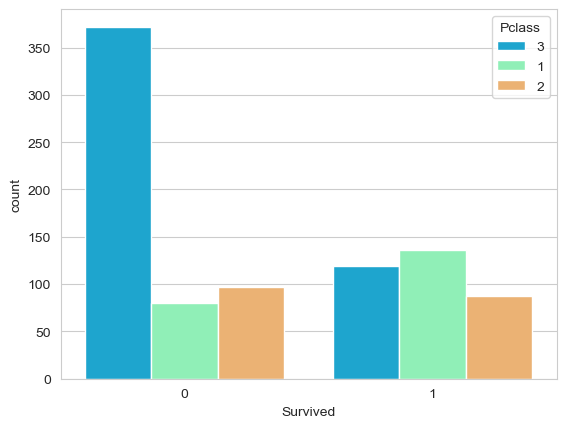

In [13]:
# Convert 'Survived' and 'Pclass' to strings
train['Survived'] = train['Survived'].astype(str)
train['Pclass'] = train['Pclass'].astype(str)

# Plot
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


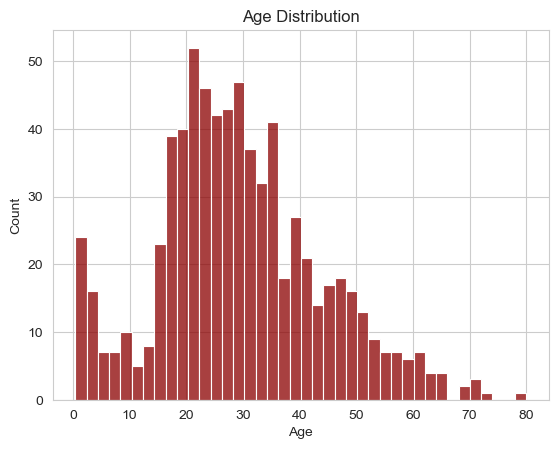

In [14]:
sns.histplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: >

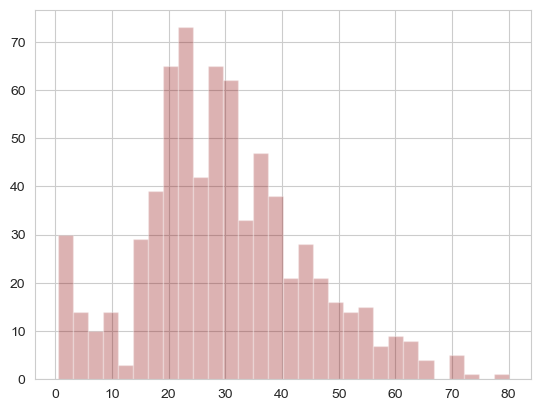

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

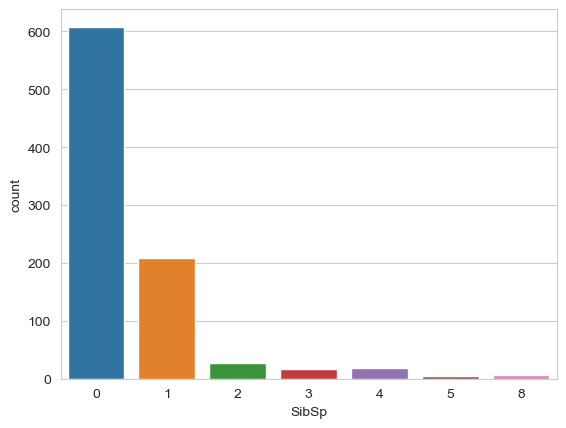

In [16]:
sns.countplot(x='SibSp', data=train)

<Axes: >

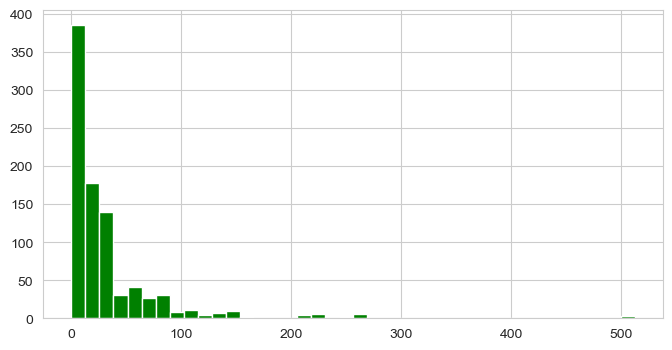

In [17]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

**<h3>Data Cleaning</h3>**

<Axes: xlabel='Pclass', ylabel='Age'>

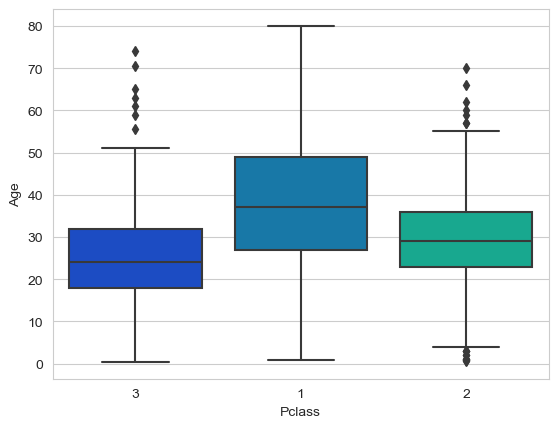

In [18]:
plt.figsize=(12,7)
sns.boxplot(x='Pclass',y='Age',data=train, palette='winter')

In [19]:
def impute_age(cols):
    Age=cols.iloc[0]
    Pclass=cols.iloc[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

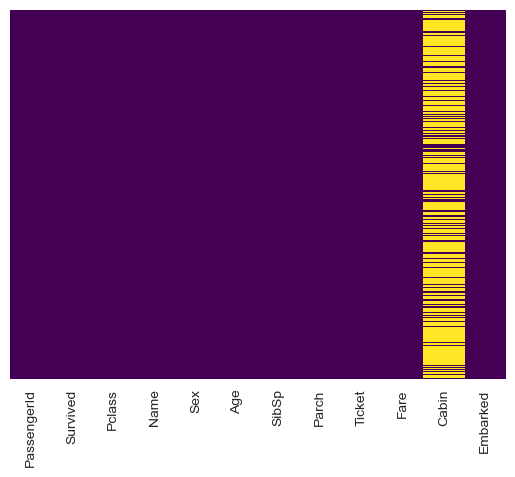

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train.dropna(inplace=True)

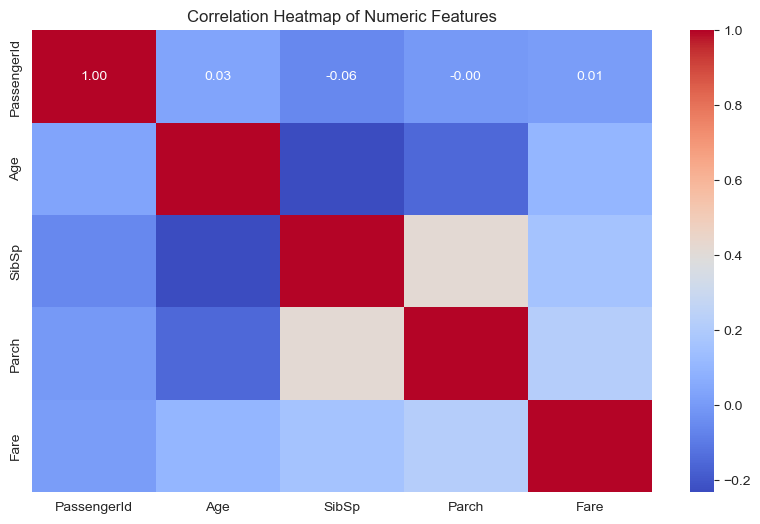

In [26]:
# Correlation heatmap for only numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(train.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**<h3>Converting Categorical Features</h3>**

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 83.3+ KB


In [80]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [81]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [82]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [85]:
train=pd.concat([train,Sex,Embarked],axis=1)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


**<h3>Building a Logistic Regression Model</h3>**

In [87]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [88]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: object

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

**<h3>Training and Predicting</h3>**

In [91]:
from sklearn.linear_model import LogisticRegression

In [94]:
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [95]:
predictions=logmodel.predict(x_test)

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
accuracy=confusion_matrix(y_test,predictions)

In [99]:
accuracy

array([[148,  15],
       [ 33,  71]], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [103]:
predictions

array(['0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0',
       '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1

## Summary of Insights

- **Survival Rate:** Females had a significantly higher survival rate than males.
- **Passenger Class:** Passengers in 1st class were more likely to survive compared to 2nd and 3rd class.
- **Age:** Younger passengers and children had better survival chances.
- **Fare:** Higher ticket fare is positively correlated with survival.
- **Missing Values:** Age and Cabin had missing values; Cabin was dropped and Age was imputed based on Pclass.
- **Outliers:** Fare had some high outliers but was retained for analysis.
